In [1]:
#
# Revisar manualmente as imagens em C:\mestrado\datasets\samples_font  ok
#
#
# Pegar todas as imagens em final-32K-8lines do tipo sync_**.jpg e sobrescrever
# usando como texto a sequencia no id correspondente em portugues.
#
# Para os fontes carregar a lista de fontes cujas imagens existem em samples_font
# buscando as fontes em C:/fonts, mais as fontes do windows usado anteriormente
# Usar as fontes aleatoriamente...
#


In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [3]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from IPython.display import clear_output

In [5]:
import random

In [6]:
import re
from shutil import copyfile

In [7]:
#
# gera imagem com jogadas escritas com fonte manuscrito
#
# -*- coding: utf-8 -*-
from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

In [52]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [9]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [53]:

# https://gist.github.com/erniejunior/601cdf56d2b424757de5
def elastic_transform_2(image, alpha, sigma,random_state=None):
#     print( alpha, sigma)
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

#     x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]))
    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
#     print (x.shape)
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    distored_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distored_image.reshape(image.shape)

In [74]:
def transform( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 1201, 10)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 1201, 10)  #random.randint( 991, 1501), random.randint( 8, 12))
    

In [10]:
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_pt.txt"
with open(pgnfile) as f:
    lines = [line.rstrip() for line in f]
    
lines= [re.sub("[\[].*?[\]]", "", ln) for ln in lines]
lines= [ln[8:] for ln in lines]
lines= [ln.split()[0:32] for ln in lines]

pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
with open(pgnfile) as f:
    en_lines = [line.rstrip() for line in f]
    
en_lines= [re.sub("[\[].*?[\]]", "", ln) for ln in en_lines]
en_lines= [ln[8:] for ln in en_lines]
en_lines= [ln.split()[0:32] for ln in en_lines]

In [11]:
print( lines[0], en_lines[0])

['d4', 'f5', 'Cf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Cf6', 'b4', 'c6', 'c4', 'd5', 'Db3', 'Be6', 'c5', 'Ce4', 'O-O', 'Cd7', 'Bf4', 'O-O', 'Cbd2', 'Bf7', 'De3', 'De8', 'Bh6', 'Cdf6', 'Ce5', 'Cxd2', 'Dxd2', 'Cd7', 'Bxg7', 'Rxg7'] ['d4', 'f5', 'Nf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Nf6', 'b4', 'c6', 'c4', 'd5', 'Qb3', 'Be6', 'c5', 'Ne4', 'O-O', 'Nd7', 'Bf4', 'O-O', 'Nbd2', 'Bf7', 'Qe3', 'Qe8', 'Bh6', 'Ndf6', 'Ne5', 'Nxd2', 'Qxd2', 'Nd7', 'Bxg7', 'Kxg7']


In [12]:
print( len( lines), len(en_lines))

30000 30000


In [ ]:
#
# le todos os fontes
#

In [645]:
new_fonts_files= glob( 'C:/mestrado/datasets/samples_font/*.ttf.jpg')

In [646]:
print( len( new_fonts_files))

77


In [96]:
[f for f in new_fonts_files if 'beneg' in f]

[]

In [647]:
new_fonts_path= [
    os.path.join( 'C:/mestrado/datasets/fonts', 
                 Path( f).name.replace( '.jpg', '')) for f in new_fonts_files]

In [20]:
ImageFont.truetype(new_fonts_path[0], 30)

In [648]:
new_fonts= [ImageFont.truetype(f, 30) for f in new_fonts_path]

In [649]:
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 30),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 30)
] 

In [650]:
all_fonts= new_fonts + fonts

In [651]:
print( len( new_fonts), len( fonts), len( all_fonts))

77 8 85


In [82]:
Path( new_fonts_path[0]).name

'A Sensible Armadillo.ttf'

In [21]:
#
# le todos os arquivos cuja imagem vai sobrescrever
#
train_label_files= glob(
    os.path.join( 'C:/mestrado/datasets/unified/final-32K-8lines--v4',
                 'train/labels/syn*.pgn'))

valid_label_files= glob(  
    os.path.join( 'C:/mestrado/datasets/unified/final-32K-8lines--v4',
                 'valid/labels/syn*.pgn'))

label_files= train_label_files+ valid_label_files

In [22]:
len( label_files)

25641

In [50]:
#
# recupera o label original de cada arquivo
#

6055

In [19]:
int( Path( label_files[0]).name[4:9])

49

In [23]:
def labelof( f):
    id= int( Path( f).name[4:9])
#     print( id)
    return lines[ id-1]

In [24]:
i= 100
print( 'labels of ', label_files[i], ' '.join( labelof( label_files[i])[0:16]))

labels of  C:/mestrado/datasets/unified/final-32K-8lines--v4\train/labels\syn_00995.pgn e4 e6 d4 d5 Cd2 Cf6 e5 Cfd7 Bd3 c5 c3 Cc6 Ce2 cxd4 cxd4 f6


In [ ]:
# # abre o arquivo original
# img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
# dctx = ImageDraw.Draw(img)  # create drawing context

In [ ]:
# show( img)

In [ ]:
# fnt= ImageFont.truetype('c:/fonts/GOODDP__.TTF', 30)

In [643]:

# def load_fonts():
#     files= glob( "C:/fonts/*.ttf")
#     fonts= []
#     for f in files:
#         fnt= ImageFont.truetype(f, 30)
#         fonts.append( (f, fnt))
#     return fonts
        
    
# all_fonts= load_fonts()    
        
# for name,fnt in all_fonts:    
#     img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
#     dctx = ImageDraw.Draw(img)  # create drawing context

#     line= "CBxd4+"

#     dh_top= 7
#     dh_bottom= 13
#     h= (img.height - dh_top - dh_bottom)/25.0
#     w= img.width/4.0

#     txtsz = dctx.textsize(line, fnt)
#     x= (w - txtsz[0])/2
#     y= 7 + (h - txtsz[1])/2 #+ margin_top
#     dctx.text( (x, y), line, font=fnt, fill="#000000")

#     imgc= img.crop( (0, 0, w, h+7*2))
    
#     imgfile= os.path.join( "C:/mestrado/datasets/samples_font", Path(name).name+".jpg")
#     print( 'save to ', imgfile)
#     imgc.save( imgfile)    


In [ ]:
# showbig( img)

In [25]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    

In [ ]:
# import glob

In [ ]:
# #
# #  gerar somente os que nao tem no handwritten
# #

# # carrega os jogos existentes
# handfiles= glob.glob( "C:/mestrado/datasets/unified/parts/handwritten/labels/*.pgn")

In [ ]:
# print( len( handfiles))

In [ ]:
# fname= handfiles[0]


In [ ]:
# Path(fname).name.split('_')

In [ ]:
# # a3__d5__d4__Nf6_5742_1494_R_part3_scan0145
# id= int( Path(fname).name.split('_')[-5])-1
# print( id)

In [ ]:
# print( read_label( fname))

In [ ]:
# " ".join( en_lines[ id])

In [ ]:
# for f in handfiles:
#     if 'scan' not in Path(f).name:
#         print( Path(f).name)


In [ ]:
# s= set()
# for f in handfiles:
#     s.add( int( Path(f).name.split('_')[-5][-4:])-1)

In [ ]:
# print( len( s))

In [ ]:
# #
# # filtra os que tem manual, os que tem tamanho menor de 16
# #
# new_lines= []
# new_en_lines=[]
# new_no= []

# for i in range( 0, len( lines)):
#     if len( en_lines[i])< 32:
#         continue
#     if i in s:
#         continue
#     new_lines.append( lines[i]) 
#     new_en_lines.append( en_lines[i]) 
#     new_no.append( i)    

In [ ]:
# print( len( new_lines))
# print( len( s))
# print( len( lines))

In [ ]:
# print( new_no[0:10])

In [ ]:
# #
# # separa em valid e test
# #
# n= len( new_lines)

# # precisa fazer shuffle?

# n_train= int(n*0.8)
# new_train_lines= new_lines[:n_train]
# new_train_en_lines=new_en_lines[:n_train]
# new_train_no= new_no[:n_train]

# new_valid_lines= new_lines[n_train:]
# new_valid_en_lines=new_en_lines[n_train:]
# new_valid_no= new_no[n_train:]

In [ ]:
# print( n, n_train)

In [26]:
len( all_fonts)

85

In [808]:
def sp_noise(npimage,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(npimage.shape,np.uint8)
    thres = 1 - prob 
    for i in range(npimage.shape[0]):
        for j in range(npimage.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = random.randint( 0, 128)
            else:
                output[i][j] = npimage[i][j]
    return output

def sp_noise_pil( pilimg, prob):
#     print( 'noise', prob)
    img= pilimg
    img= np.asarray( img)
    img= sp_noise(img, prob)
    img= PIL.Image.fromarray( img)
    return img

def distorce( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
#     print( 'distorce')
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
    

# Rotate the foreground
def rotate( pilimg):
#     print( 'rotate')
    foreground= pilimg
    angle_degrees = random.uniform(-2.5,2.5)
#     print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
    scale = random.random() * .5 + .5 # Pick something between .5 and 1
    new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
    foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    

def random_transform( pilimg, p):
    img= pilimg
    if( random.random()< 0.8):
        img= rotate( img)
#     if( random.random()< 0.1):
#         img= distorce( img)
    if( random.random()< 0.25):
        img= sp_noise_pil( img, random.uniform( 0.001, 0.0001))
    
    return img


In [814]:
len( label_files)

25641

In [815]:
img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
dctx = ImageDraw.Draw(img)  # create drawing context
dh_top= 7
dh_bottom= 13
h= (img.height - dh_top - dh_bottom)/25.0
w= img.width/4.0

margin_left= w/4
margin_top= h/6

def resize_fixed( img):
    _dd = (271, 230) #width, height
    return cv2.resize(img, _dd, interpolation = cv2.INTER_AREA) 

def generate_for( line):
#     if fnt is None:
#         fnt= random.choice( fonts)
#     print( fnt.getname())
    
    img = Image.open("C:/mestrado/datasets/syn/template/template.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    i= 0
    for ln in range( 0, 8):
        for col in range( 0, 2):
            if i>= len( line):
                del dctx
                return img
        
            fnt= random.choice( fonts)
            txtsz = dctx.textsize(line[i], fnt)
        
            x= w* col + (w - txtsz[0])/2
            if random.random()< 0.7:
                xmargem= int( (w - txtsz[0])/3)
                x+= random.randint( -xmargem, xmargem)
            y= dh_top + h*ln + (h - txtsz[1])/2 #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i= i+1
            
    del dctx
    return img

def cut( img):
    h= 300
    w= 345

    img1= img[:h, :w]
    return img1

def generate_one( no, label, img_file): #pt_line, pgn, no, folder):
#     id_font= no%len( all_fonts)
    img= generate_for( label)
    img= cut( np.asarray(img))
    img= resize_fixed( img)
    img= PIL.Image.fromarray(np.uint8(img))
#     img.save( img_file)
#     img.save( img_file.replace( '.jpg', '-'+Path( new_fonts_path[id_font]).name+'.jpg'))
    return img


def __generate():
    _files= label_files
#     print( 'Gerando ', len( _files))
    for i in range( 0, len( _files)):
        if i%100== 0:
            print( i)
        img_file= _files[i].replace( 'labels', 'images.new').replace( '.pgn', '.jpg') 
        img= generate_one( i, labelof( _files[i])[0:16], img_file)
        
        img= random_transform( img, 0.3)
        img.save( img_file)
#         print( img_file)
#         show( img__)
#         show( transform( img__))
#         return img
    
__generate()
# img1= __generate()
# show( img1)
# pilimg= img1
# npimg= np.asarray( img1)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

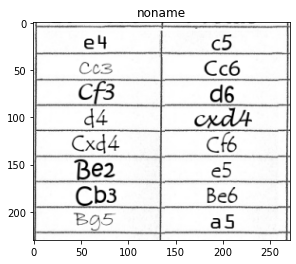

In [114]:
# show( pilimg)

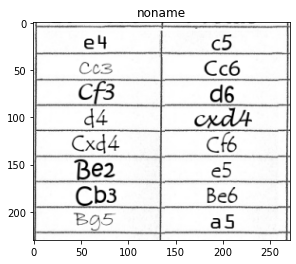

In [115]:
show( npimg)

1.496297095975537


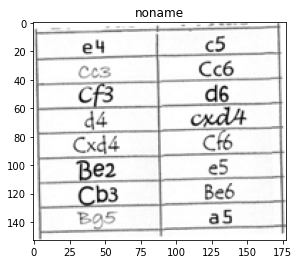

In [192]:
# Rotate the foreground
def rotate( pilimg):
    foreground= pilimg
    angle_degrees = random.uniform(-2,2)
    print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
    scale = random.random() * .5 + .5 # Pick something between .5 and 1
    new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
    foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    
show( rotate( pilimg))

In [133]:
dir( Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'UnidentifiedImageError',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__get

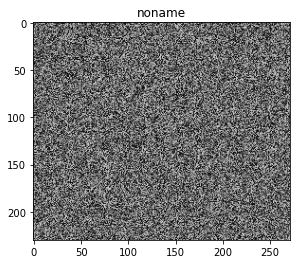

In [228]:
def add_gaussian_noise(img):
    row, col, _ = img.shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    gaussian = np.random.random((row, col, 1)).astype(np.float32)
    gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
    gaussian_img = cv2.addWeighted(gaussian, 0.75, 0.25 * gaussian, 0.25, 0)
    gaussian_noise_imgs = np.array(gaussian_img, dtype = np.float32)
    return gaussian_noise_imgs
  
show( add_gaussian_noise( npimg))

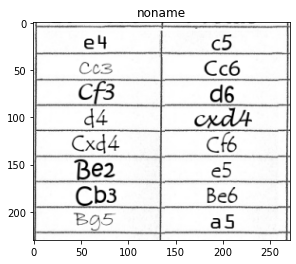

In [203]:
show( npimg)

In [200]:
def noisy(noise_typ,image):
#     np.array(gaussian_img, dtype = np.float32)
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


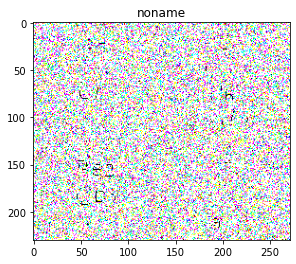

In [221]:
show( noisy( "speckle", npimg))

In [231]:
!pip install scikit-image

You should consider upgrading via the 'C:\venv\mestrado\Scripts\python.exe -m pip install --upgrade pip' command.


In [237]:
import skimage
import skimage.io
import matplotlib.pyplot as plt

In [242]:
# https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
img_path= "C:/mestrado/datasets/unified/final-32K-8lines--v4/train/images/syn_00049.jpg"
skimg = skimage.io.imread(img_path)/255.0

In [240]:
skimage.__version__


'0.17.2'

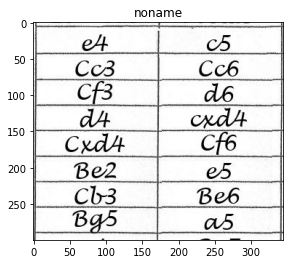

In [243]:
show( skimg)

gaussian


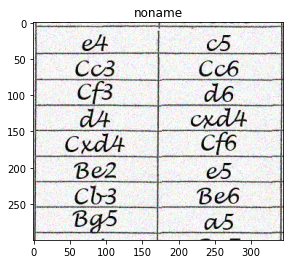

localvar


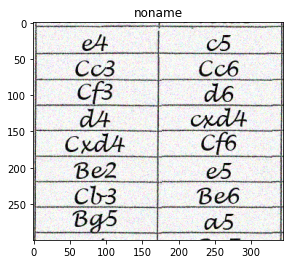

poisson


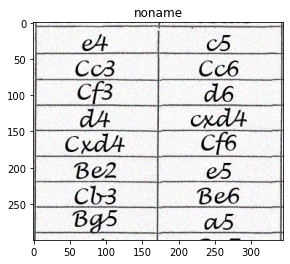

salt


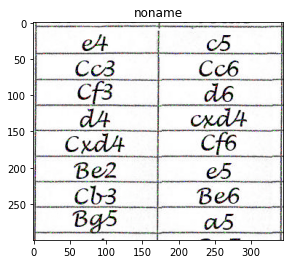

pepper


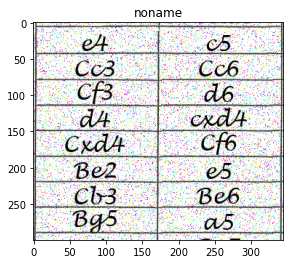

s&p


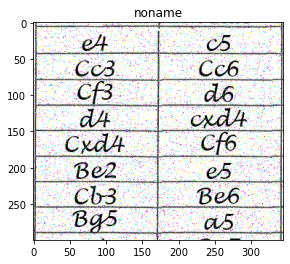

speckle


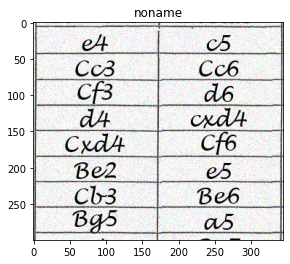

In [253]:
for mode in ['gaussian', "localvar", "poisson", "salt", "pepper", "s&p", "speckle"]:
    print( mode)
    show( skimage.util.random_noise(skimg, mode=mode))

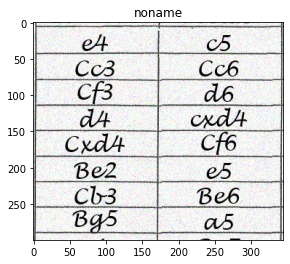

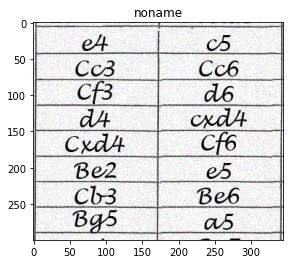

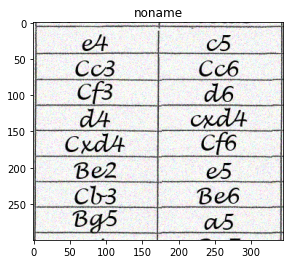

In [251]:
for i in range( 0, 3):
    show( skimage.util.random_noise(skimg, mode=mode))


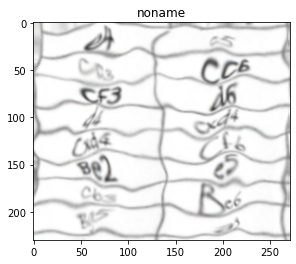

In [110]:
img1= transform( img1)
show( img1)

In [68]:
type( img1)

PIL.Image.Image

In [70]:
img1__= np.asarray(img1)

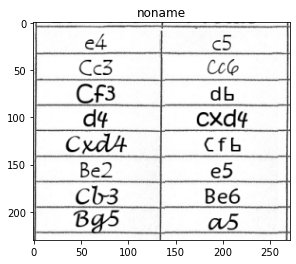

In [71]:
show( img1__)

In [63]:
img2= cv2.imread( "C:/mestrado/datasets/unified/final-32K-8lines--v4/train/images/syn_00049.jpg")

In [64]:
type( img2)

numpy.ndarray

In [73]:
type( img2)== np.ndarray

True

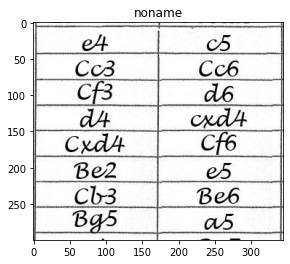

In [65]:
show( img2)

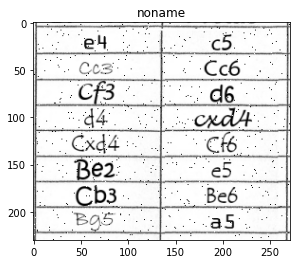

In [269]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# image = cv2.imread('image.jpg',0) # Only for grayscale image
show( sp_noise(npimg,0.01))

In [45]:
#
# gera mais N imagens a partir de dados do mesmo dataset
#
def generate_more( N):
    for k in range( 0, N):
        if k%100== 0:
            print( k)
        
        #
        # pega um aleatorio
        #
        i= random.randrange( 0, len( train_label_files))
#         print( i)
#         print( train_label_files[i])
        
        # gera uma nova imagem
        #
        #
        lote= '_lote3_'+ str(k).zfill(5)
        img_file= train_label_files[i].replace(
            'labels', 'new.images').replace(
            '.pgn', lote+'.jpg')
        img__= generate_one( 
            random.randrange( 0, len(all_fonts)-1),
            labelof( train_label_files[i])[0:16], 
            img_file)
        label_file= train_label_files[i].replace(
            'labels', 'new.labels').replace(
            '.pgn', lote+'.pgn')

#         show( img__)
#         print( img_file)
#         print( label_file)
        
        # salva a imagem e cria nova label
        img__.save( img_file)
        copyfile( train_label_files[i], label_file)
            
generate_more( 10000)    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
